In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer, KNNImputer

In [2]:
data = pd.read_csv('stroke_data.csv')
data.sample(10)


,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3331,3331,10511,Male,5.0,0.0,0.0,No,children,Urban,101.61,33.1,Unknown,0
3469,3469,62306,Female,69.0,1.0,0.0,Yes,Self-employed,Urban,111.81,26.1,formerly smoked,0
2763,2763,72451,Female,45.0,0.0,0.0,Yes,Private,Rural,63.73,32.0,Unknown,0
4657,4657,21852,Male,2.0,0.0,0.0,No,children,Rural,96.47,19.5,Unknown,0
967,967,5694,Male,21.0,0.0,0.0,No,Private,Rural,102.05,29.9,never smoked,0
3053,3053,10436,Female,29.0,0.0,0.0,Yes,Private,Rural,102.07,31.8,never smoked,0
3551,3551,20421,Female,43.0,0.0,0.0,Yes,Private,Rural,68.94,26.8,never smoked,0
3379,3379,10138,Female,41.0,0.0,0.0,Yes,Private,Urban,74.85,24.8,formerly smoked,0
434,434,38119,Male,64.0,NaN,0.0,Yes,Govt_job,Urban,94.48,31.1,never smoked,0
3777,3777,47563,Female,17.0,0.0,0.0,No,Private,Rural,68.66,35.1,never smoked,0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5110 non-null   int64  
 1   id                 5110 non-null   int64  
 2   gender             5110 non-null   object 
 3   age                5110 non-null   float64
 4   hypertension       4380 non-null   float64
 5   heart_disease      4716 non-null   float64
 6   ever_married       5110 non-null   object 
 7   work_type          5110 non-null   object 
 8   Residence_type     5110 non-null   object 
 9   avg_glucose_level  5110 non-null   float64
 10  bmi                4909 non-null   float64
 11  smoking_status     4599 non-null   object 
 12  stroke             5110 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 519.1+ KB


In [4]:
data.isna().sum()
#kolku nan ima

Unnamed: 0             0
id                     0
gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status       511
stroke                 0
dtype: int64

In [5]:
data.drop(columns=['Unnamed: 0', 'id'], inplace=True)
data.sample(10)
#unnamed se brise sekoas i id

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3613,Female,76.0,1.0,0.0,Yes,Self-employed,Urban,78.70,27.6,formerly smoked,0
3978,Male,20.0,0.0,NaN,No,Private,Urban,59.67,27.7,never smoked,0
1132,Male,2.0,0.0,0.0,No,children,Rural,103.25,19.4,Unknown,0
4101,Female,61.0,0.0,0.0,Yes,Private,Rural,93.97,39.4,Unknown,0
2588,Male,6.0,0.0,0.0,No,children,Rural,79.05,17.9,Unknown,0
4906,Female,53.0,0.0,0.0,Yes,Private,Urban,70.51,54.1,never smoked,0
3502,Male,81.0,0.0,1.0,Yes,Self-employed,Rural,68.27,25.0,Unknown,0
2635,Female,79.0,0.0,0.0,Yes,Self-employed,Rural,97.81,26.6,formerly smoked,0
2921,Male,8.0,0.0,0.0,No,children,Rural,107.97,26.7,Unknown,0
2474,Male,8.0,0.0,0.0,No,children,Rural,90.26,18.1,Unknown,0


In [6]:
#hypertension i smokingstatus se so ajle missing,pa moze da gi stavim so mean/median
#  data['bmi'].fillna(data['bmi'].median(), inplace=True)

#| Missing % | Што да правиш?            |
#| --------- | ------------------------- |
#/ 0–20%     | Пополнување               |
#| 20–50%    | Зависи, често пополнување |
#| >50%      | Drop                      |
#len(data)


In [7]:
data.sample(10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3221,Male,65.00,0.0,0.0,Yes,Private,Rural,223.90,28.2,formerly smoked,0
1605,Female,35.00,0.0,0.0,Yes,Self-employed,Rural,151.25,28.4,Unknown,0
4817,Female,51.00,0.0,0.0,Yes,Self-employed,Urban,67.26,33.1,formerly smoked,0
1957,Female,1.56,0.0,0.0,No,children,Urban,113.40,19.5,Unknown,0
846,Male,71.00,0.0,0.0,Yes,Govt_job,Rural,186.45,26.7,never smoked,0
1602,Female,62.00,0.0,0.0,Yes,Govt_job,Rural,73.44,23.4,Unknown,0
4804,Female,39.00,0.0,0.0,No,Private,Rural,79.00,30.0,never smoked,0
3031,Male,2.00,NaN,1.0,No,children,Urban,62.89,29.4,Unknown,0
1352,Male,72.00,0.0,NaN,Yes,Self-employed,Rural,72.09,NaN,smokes,0
2019,Female,20.00,0.0,0.0,No,Private,Urban,80.08,25.1,never smoked,0


In [9]:

grouped_data = data.groupby(by=['Residence_type', 'work_type']).size().reset_index(name='count')
grouped_data 
#prave nova promenliva


,Residence_type,work_type,count
0,Rural,Govt_job,312
1,Rural,Never_worked,7
2,Rural,Private,1462
3,Rural,Self-employed,393
4,Rural,children,340
5,Urban,Govt_job,345
6,Urban,Never_worked,15
7,Urban,Private,1463
8,Urban,Self-employed,426
9,Urban,children,347


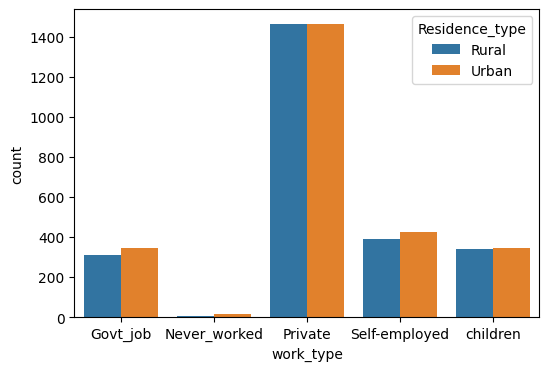

In [10]:

plt.figure(figsize=(6, 4))
sns.barplot(data=grouped_data, x='work_type', y='count', hue='Residence_type')
plt.show()

#plt.xticks(rotation=45)   akoe e zbien

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       4380 non-null   float64
 3   heart_disease      4716 non-null   float64
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4599 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 439.3+ KB


In [13]:
data.groupby(by=['heart_disease', 'stroke']).size().reset_index(name='count')

,heart_disease,stroke,count
0,0.0,0,4274
1,0.0,1,186
2,1.0,0,213
3,1.0,1,43


In [16]:
data.isna().sum()


gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status       511
stroke                 0
dtype: int64

In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       4380 non-null   float64
 3   heart_disease      4716 non-null   float64
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4599 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 439.3+ KB


In [18]:

data['smoking_status'].value_counts()

smoking_status
never smoked       1708
Unknown            1377
formerly smoked     802
smokes              712
Name: count, dtype: int64

In [ ]:
#LABEL ENCODER

In [21]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
label_encoder.classes_
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1107,0,22.0,0.0,0.0,No,Private,Urban,73.4,21.6,never smoked,0


In [24]:
"""
od voa
Male
Female
Other
Female

u voa
Female → 0
Male → 1
Other → 2


Бидејќи машинското учење НЕ може да работи со текст.
Алгоритмите како:
Random Forest
Logistic Regression
SVM
KNN
Neural Networks
… очекуваат бројчани вредности, НЕ текст.




    Кога користиш LabelEncoder?
Кога категоријата има само 2 вредности:
Male / Female
Yes / No
Rural / Urban
0 / 1
Или можеш да го користиш и за 3+, ама тогаш OneHotEncoder е подобар.


    data = pd.get_dummies(data, columns=['work_type', 'Residence_type', 'ever_married', 'smoking_status'], drop_first=True)
so voa moze site naenas


Најдобри модели кога користиш One-Hot:
Logistic Regression (ако предвидуваш 0/1)
Linear Regression (ако предвидуваш број)
Random Forest
XGBoost / Gradient Boosting
SVM
KNN




linear regression: br,cena,vozzrat predviduvame
    logistic regression=targegtot e 1/0
                       random forest=i broj i kateg koloni, all in, za se go biva
| Каков таргет имаш?        | Кој модел?              |
| ------------------------- | ----------------------- |
| Број (continuous)         | Linear Regression       |
| 0/1 (classification)      | Logistic Regression     |
| Повеќе категории (0,1,2…) | RandomForestClassifier  |
| Комплексни податоци       | Random Forest / XGBoost |

      logistic,xgbossting,randomForestClassifier,svm  
""""

SyntaxError: unterminated string literal (detected at line 61) (742535675.py, line 61)

In [25]:
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
label_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [26]:
data['work_type'] = label_encoder.fit_transform(data['work_type'])
label_encoder.classes_

array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype=object)

In [27]:
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
label_encoder.classes_
data.sample()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
534,0,20.0,0.0,0.0,0,2,1,127.18,31.0,Unknown,0


In [28]:
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])
label_encoder.classes_
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1087,0,19.0,0.0,0.0,0,2,0,106.56,29.9,2,0


In [30]:
data.loc[data['smoking_status'] == 4, 'smoking_status'] = np.nan
data.sample(10)
#do tuka label encoder

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4499,1,54.0,0.0,0.0,1,2,0,57.56,27.5,2.0,0
4749,0,55.0,0.0,0.0,1,2,1,59.36,34.1,3.0,0
3453,0,25.0,0.0,0.0,1,2,1,104.66,23.9,2.0,0
4541,0,33.0,0.0,0.0,1,2,0,84.68,34.7,1.0,0
4254,0,10.0,0.0,0.0,0,4,1,77.43,16.2,0.0,0
3751,0,36.0,0.0,0.0,0,2,1,96.10,29.6,2.0,0
1055,1,57.0,0.0,0.0,1,2,0,111.64,31.5,2.0,0
4735,1,18.0,0.0,0.0,0,2,0,115.46,27.6,0.0,0
1445,1,9.0,0.0,0.0,0,4,0,60.39,16.4,0.0,0
2866,1,76.0,0.0,0.0,1,2,1,192.39,31.0,2.0,0


<Axes: xlabel='heart_disease', ylabel='Count'>

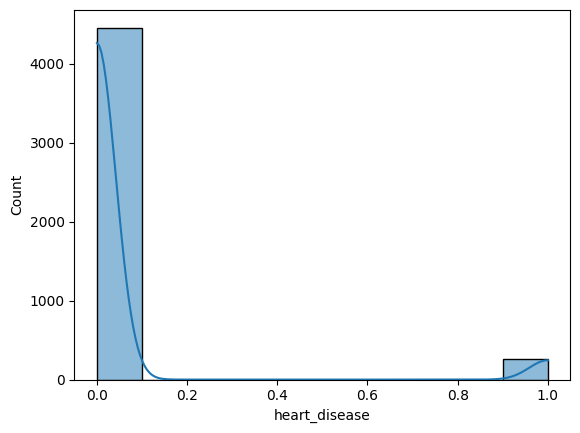

In [31]:
data.isna().sum()
sns.histplot(data['heart_disease'], kde=True, bins=10)


In [32]:
#sega inputirame
#импутер кој ќе ги пополни сите NaN вредности со медијана на колоната.
#mediana za numericki koloni
median_imputer = SimpleImputer(strategy="median")


In [33]:

#data[numeric_columns] = median_imputer.fit_transform(data[numeric_columns])
data[['bmi']] = median_imputer.fit_transform(data[['bmi']])
data.sample()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2988,1,44.0,0.0,0.0,1,2,0,60.32,25.0,2.0,0


In [34]:

"""
„Most frequent“ значи:
👉 Импутерот ќе ја пополни празната вредност со најчестата категорија во таа колона.
Ова се користи за категориски колони, бидејќи медијана и просек таму немаат смисла.
    from sklearn.impute import SimpleImputer
most_freq_imputer = SimpleImputer(strategy="most_frequent")
data[["gender", "work_type", "Residence_type", "smoking_status"]] = \
    most_freq_imputer.fit_transform(data[["gender", "work_type", "Residence_type", "smoking_status"]])

| Импутер           | Кога се користи    | Пример            |
| ----------------- | ------------------ | ----------------- |
| **median**        | нумерички колони   | age, bmi          |
| **most_frequent** | категориски колони | gender, work_type |

    gender	age	hypertension	heart_disease	ever_married	work_type	Residence_type	avg_glucose_level	bmi	smoking_status	stroke
    1. Нумерички колони → користиш median
age
hypertension
heart_disease
avg_glucose_level
bmi
stroke (0 или 1, ама сепак е бројчеста)


    Категориски колони → користиш most_frequent
Овие НЕ се бројки, туку категории/текст:
gender
ever_married
work_type
Residence_type
smoking_statu

Прво импутирај → па енкодирај
Правилно редослед:
1️⃣ data.isna().sum() – да видиш каде има празни
2️⃣ Импутација
3️⃣ OneHotEncoder или LabelEncoder (што и да користиш)
4️⃣ Стандарден моделирање (Logistic Regression, Random Forest, SVM…)
"""

'\n„Most frequent“ значи:\n👉 Импутерот ќе ја пополни празната вредност со најчестата категорија во таа колона.\nОва се користи за категориски колони, бидејќи медијана и просек таму немаат смисла.\n    from sklearn.impute import SimpleImputer\nmost_freq_imputer = SimpleImputer(strategy="most_frequent")\ndata[["gender", "work_type", "Residence_type", "smoking_status"]] =     most_freq_imputer.fit_transform(data[["gender", "work_type", "Residence_type", "smoking_status"]])\n\n| Импутер           | Кога се користи    | Пример            |\n| ----------------- | ------------------ | ----------------- |\n| **median**        | нумерички колони   | age, bmi          |\n| **most_frequent** | категориски колони | gender, work_type |\n\n    gender\tage\thypertension\theart_disease\tever_married\twork_type\tResidence_type\tavg_glucose_level\tbmi\tsmoking_status\tstroke\n    1. Нумерички колони → користиш median\nage\nhypertension\nheart_disease\navg_glucose_level\nbmi\nstroke (0 или 1, ама сепак е

In [35]:
data.isna().sum()


gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status       511
stroke                 0
dtype: int64

In [36]:
#gpt vika greska e
knn_imputer = KNNImputer(n_neighbors=21)
data['smoking_status'] = knn_imputer.fit_transform(data[['smoking_status']])
data.isna().sum()
data['heart_disease'] = knn_imputer.fit_transform(data[['heart_disease']])

knn_imputer = KNNImputer(n_neighbors=31)
data['hypertension'] = knn_imputer.fit_transform(data[['hypertension']])
data.isna().sum()
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4571,0,40.0,0.097945,0.000000,1,2,1,72.99,46.4,0.000000,0
4948,0,31.0,0.000000,0.000000,1,2,1,117.31,28.4,2.000000,0
650,0,54.0,0.000000,0.054283,1,3,1,92.39,22.1,1.381605,0
4848,0,7.0,0.000000,0.000000,0,4,1,128.17,18.9,0.000000,0
2675,0,69.0,1.000000,0.000000,1,0,1,208.20,32.6,1.000000,0
1466,1,51.0,1.000000,0.000000,1,2,0,163.56,28.1,1.000000,0
2806,0,56.0,0.000000,0.000000,1,2,1,82.12,32.5,3.000000,0
3426,0,15.0,0.000000,0.000000,0,2,0,79.20,22.4,2.000000,0
1683,0,27.0,0.000000,0.000000,0,2,0,103.35,28.1,1.000000,0
2050,1,12.0,0.000000,0.000000,0,4,0,96.15,18.7,1.381605,0


<Axes: >

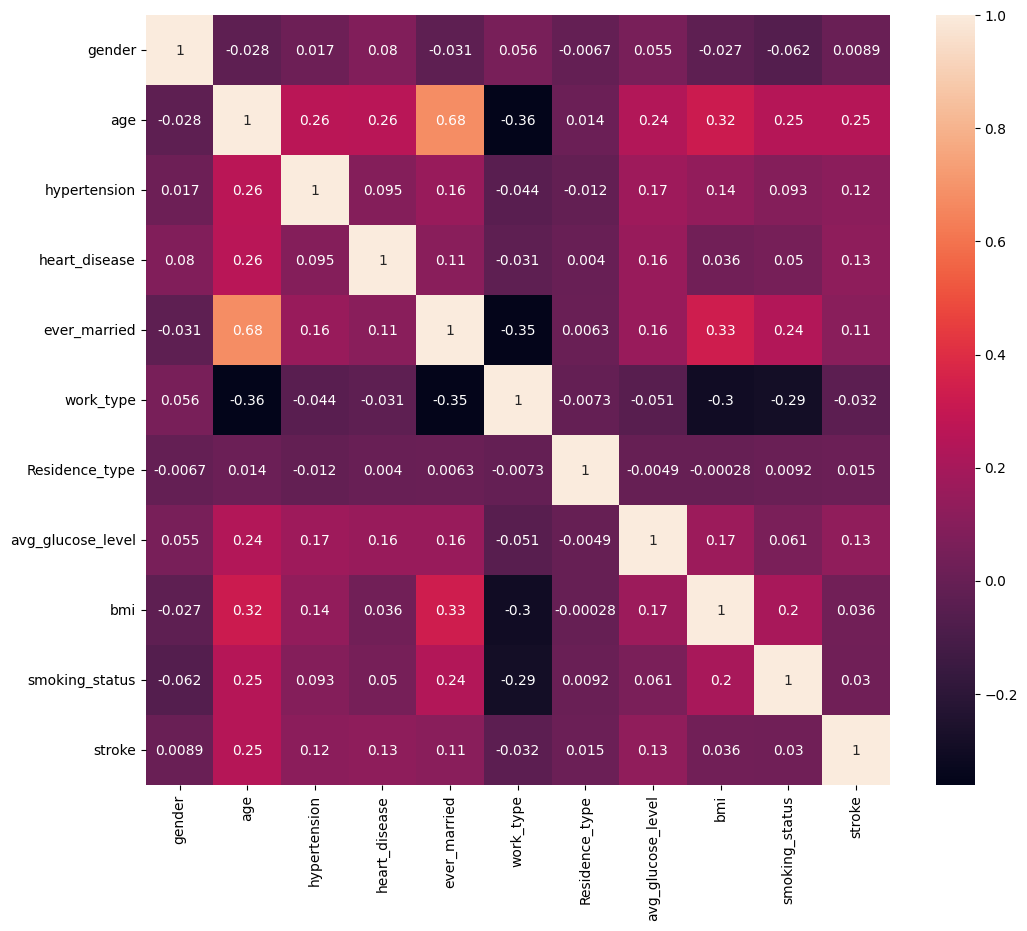

In [37]:
"""Редоследот мора да биде:

❗ 1. Направи NaN на "Unknown" (Оригинален текст)
❗ 2. Пополни NaN со most frequent
❗ 3. LabelEncoder / OneHotEncoder
"""

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [39]:
data.sample()


X = data.iloc[:, :-1]
X

y = data.iloc[:, -1:]
y



,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [40]:
"""
Доколку твојата последна колона е stroke → ова е точно и правилно.
✔ Значи X ги содржи:
gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status


Значи y = таргет колона → stroke
"""

'\nДоколку твојата последна колона е stroke → ова е точно и правилно.\n✔ Значи X ги содржи:\ngender\nage\nhypertension\nheart_disease\never_married\nwork_type\nResidence_type\navg_glucose_level\nbmi\nsmoking_status\n\n\nЗначи y = таргет колона → stroke\n'

In [41]:
"""
Кој модел сакаш да го тренираш?
Најчести избори:
1️⃣ Logistic Regression
– најдобар за binary classification
– брз, чист, лесно се разбира
2️⃣ Random Forest Classifier
– многу силен
– не бара scaling
– многу добар за табели
3️⃣ SVM
– добар, но бара scaling
4️⃣ KNN
– мора scaling, бавен на големи податоци
5️⃣ XGBoost
– најсилен модел (ако го имаш инсталирано)
"""


'\nКој модел сакаш да го тренираш?\nНајчести избори:\n1️⃣ Logistic Regression\n– најдобар за binary classification\n– брз, чист, лесно се разбира\n2️⃣ Random Forest Classifier\n– многу силен\n– не бара scaling\n– многу добар за табели\n3️⃣ SVM\n– добар, но бара scaling\n4️⃣ KNN\n– мора scaling, бавен на големи податоци\n5️⃣ XGBoost\n– најсилен модел (ако го имаш инсталирано)\n'

In [42]:
X = data.drop(columns=['stroke'])
X

y = data['stroke']
y

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
#80/20
#test_size=0.3 → 30% тест, 70% тренинг
#test_size=0.1 → 10% тест, 90% тренинг
#test_size=0.25 → 25% тест, 75% тренинг

In [45]:
classifier = LogisticRegression().fit(train_X, train_y)
pred_y = classifier.predict(test_X)   #Предвидува вредности (0 или 1) за оние 20% кои моделот не ги видел.

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))  #Мери колку точни предвидувања има моделот.

print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))



"""
LogisticRegression() → го создава моделот
.fit(train_X, train_y) → го учи моделот на 80% од податоците (train set)
"""



"""
|                 | Претп. 0 | Претп. 1 |
| --------------- | -------- | -------- |
| **Вистински 0** | TN       | FP       |
| **Вистински 1** | FN       | TP       |
TN = точно предвидено дека нема stroke
TP = точно предвидено дека има stroke
FP = погрешно предвидено stroke
FN = пропуштен случај (најопасно)


dr print
| Class | Precision | Recall | F1   |
| ----- | --------- | ------ | ---- |
| 0     | 0.98      | 0.99   | 0.99 |
| 1     | 0.20      | 0.05   | 0.08 |
"""

Accuracy: 0.952054794520548
[[973   2]
 [ 47   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       975
           1       0.00      0.00      0.00        47

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



C:\Users\pc\PycharmProjects\vnpVezbi\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'\n|                 | Претп. 0 | Претп. 1 |\n| --------------- | -------- | -------- |\n| **Вистински 0** | TN       | FP       |\n| **Вистински 1** | FN       | TP       |\nTN = точно предвидено дека нема stroke\nTP = точно предвидено дека има stroke\nFP = погрешно предвидено stroke\nFN = пропуштен случај (најопасно)\n\n\ndr print\n| Class | Precision | Recall | F1   |\n| ----- | --------- | ------ | ---- |\n| 0     | 0.98      | 0.99   | 0.99 |\n| 1     | 0.20      | 0.05   | 0.08 |\n'

In [46]:
data['stroke'].value_counts()

data_stroke = data.loc[data['stroke'] == 1]   #Ова само ги вади сите редови каде stroke == 1.
data_stroke


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0.097945,0.054283,1,2,1,228.69,36.6,1.381605,1
1,0,61.0,0.000000,0.000000,1,3,0,202.21,28.1,2.000000,1
2,1,80.0,0.000000,1.000000,1,2,0,105.92,32.5,2.000000,1
3,0,49.0,0.000000,0.000000,1,2,1,171.23,34.4,3.000000,1
4,0,79.0,1.000000,0.000000,1,3,0,174.12,24.0,2.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
244,1,57.0,0.000000,0.000000,1,2,0,84.96,36.7,0.000000,1
245,0,14.0,0.097945,0.000000,0,4,0,57.93,30.9,0.000000,1
246,0,75.0,0.000000,0.000000,1,3,0,78.80,29.3,1.000000,1
247,1,71.0,1.000000,0.054283,1,3,0,87.80,28.1,0.000000,1


In [47]:

data_no_stroke = data.loc[data['stroke'] == 0]
data_no_stroke = data_no_stroke.sample(300)
data_no_stroke



#Кај stroke = 0 имаш премногу редови
#Ги земаш само 300 од нив, случајно

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3039,1,25.0,0.0,0.000000,1,2,1,89.87,26.5,2.0,0
3639,0,51.0,1.0,0.000000,1,2,0,85.84,31.8,2.0,0
3673,1,53.0,0.0,0.000000,1,0,0,159.39,29.2,2.0,0
2004,1,53.0,0.0,0.000000,1,2,0,198.24,38.1,2.0,0
3467,0,24.0,0.0,0.000000,1,2,0,76.42,24.8,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1426,0,6.0,0.0,0.000000,0,4,0,119.88,17.8,0.0,0
2936,1,16.0,0.0,0.000000,0,2,0,99.49,22.0,0.0,0
547,0,26.0,0.0,0.000000,1,2,0,75.29,22.6,3.0,0
3341,0,59.0,0.0,0.054283,1,2,0,134.24,28.8,0.0,0


In [48]:

new_data = pd.concat([data_no_stroke, data_stroke])
new_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3039,1,25.0,0.000000,0.000000,1,2,1,89.87,26.5,2.0,0
3639,0,51.0,1.000000,0.000000,1,2,0,85.84,31.8,2.0,0
3673,1,53.0,0.000000,0.000000,1,0,0,159.39,29.2,2.0,0
2004,1,53.0,0.000000,0.000000,1,2,0,198.24,38.1,2.0,0
3467,0,24.0,0.000000,0.000000,1,2,0,76.42,24.8,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
244,1,57.0,0.000000,0.000000,1,2,0,84.96,36.7,0.0,1
245,0,14.0,0.097945,0.000000,0,4,0,57.93,30.9,0.0,1
246,0,75.0,0.000000,0.000000,1,3,0,78.80,29.3,1.0,1
247,1,71.0,1.000000,0.054283,1,3,0,87.80,28.1,0.0,1


In [49]:

new_data = new_data.sample(frac=1)
new_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3879,0,35.0,0.000000,0.0,1,0,0,97.60,44.8,3.0,0
1834,1,37.0,0.097945,0.0,0,2,1,90.95,24.6,3.0,0
1719,1,34.0,0.000000,0.0,1,2,0,86.51,28.1,1.0,0
443,1,20.0,0.000000,0.0,0,0,0,98.70,26.2,0.0,0
4736,0,35.0,0.000000,0.0,1,2,0,123.94,28.7,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2811,1,20.0,0.000000,0.0,0,2,0,88.47,28.1,3.0,0
1434,0,45.0,0.000000,0.0,1,2,1,92.86,35.1,1.0,0
172,0,60.0,0.000000,0.0,1,2,1,97.43,26.4,3.0,1
1967,1,75.0,0.097945,0.0,1,2,0,87.69,26.2,1.0,0


In [50]:

X = new_data.drop(columns=['stroke'])
y = new_data['stroke']

In [52]:

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
classifier = LogisticRegression().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))


print(confusion_matrix(test_y, pred_y))

print(classification_report(test_y, pred_y))




"""

|              | Predict 0 | Predict 1 |
| ------------ | --------- | --------- |
| **Actual 0** | TN        | FP        |
| **Actual 1** | FN        | TP        |
    TN (True Negative) → моделот кажал 0, стварно е 0
TP (True Positive) → моделот кажал 1, стварно е 1
FP (False Positive) → моделот кажал дека има stroke, ама НЕМА
FN (False Negative) → моделот кажал дека нема stroke, ама ВО ИСТИНА ИМА ❗
"""
"""
precision = TP / (TP + FP)
recall = TP / (TP + FN)
"""

Accuracy: 0.7818181818181819
[[44 14]
 [10 42]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        58
           1       0.75      0.81      0.78        52

    accuracy                           0.78       110
   macro avg       0.78      0.78      0.78       110
weighted avg       0.78      0.78      0.78       110



C:\Users\pc\PycharmProjects\vnpVezbi\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'\nprecision = TP / (TP + FP)\nrecall = TP / (TP + FN)\n'

In [54]:

model = XGBClassifier(max_depth=7, min_child_weight=1, n_estimators=50, n_jobs=-1, learning_rate=0.01)
model.fit(train_X, train_y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)


y_pred = model.predict(test_X)

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))





SyntaxError: positional argument follows keyword argument (3682348902.py, line 15)

In [55]:
"""
1️⃣ max_depth=7
Колку „длабоки“ ќе бидат дрвата во XGBoost.
Поголема длабочина → посилен модел, но може да оверфитира
7 е релативно длабоко → моделира комплексни врски
Обично се става 3–10.

2️⃣ min_child_weight=1
Минимална количина на податоци за да се направи нов split во дрвото.
Помало = пофлексибилно дрво
Поголемо = помалку флексибилно, спречува overfitting
Вредност 1 е класична.

3️⃣ n_estimators=50
Колку дрва ќе изгради XGBoost.
Повеќе дрва → подобар модел, но побавно
50 е брзо, но не многу силно.
Често се користи 200, 300, 500.

4️⃣ n_jobs=-1
Користи сите CPU cores → побрзо тренирање.

5️⃣ learning_rate=0.01
Колку „брзо“ учи моделот.
Многу ниско → учи спорио, но попрецизно
Многу високо → учи брзо, но може да промашува
0.01 = многу добро, но бара многу дрва
(значи n_estimators треба да е 200+).
"""

'\n1️⃣ max_depth=7\nКолку „длабоки“ ќе бидат дрвата во XGBoost.\nПоголема длабочина → посилен модел, но може да оверфитира\n7 е релативно длабоко → моделира комплексни врски\nОбично се става 3–10.\n\n2️⃣ min_child_weight=1\nМинимална количина на податоци за да се направи нов split во дрвото.\nПомало = пофлексибилно дрво\nПоголемо = помалку флексибилно, спречува overfitting\nВредност 1 е класична.\n\n3️⃣ n_estimators=50\nКолку дрва ќе изгради XGBoost.\nПовеќе дрва → подобар модел, но побавно\n50 е брзо, но не многу силно.\nЧесто се користи 200, 300, 500.\n\n4️⃣ n_jobs=-1\nКористи сите CPU cores → побрзо тренирање.\n\n5️⃣ learning_rate=0.01\nКолку „брзо“ учи моделот.\nМногу ниско → учи спорио, но попрецизно\nМногу високо → учи брзо, но може да промашува\n0.01 = многу добро, но бара многу дрва\n(значи n_estimators треба да е 200+).\n'

In [56]:

y_pred = model.predict(test_X)

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

NameError: name 'model' is not defined